In [1]:

!pip install mlflow
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score


from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.shape

(569, 31)

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [6]:
train, test = train_test_split(df, test_size=0.2)

In [7]:
test_target = test['target']
test[['target']].to_csv('test-target.csv', index=False)
del test['target']
test.to_csv('test.csv', index=False)

features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train['target']

x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                            test_size=.20,
                                                            random_state=123,
                                                            stratify=y_raw)

In [8]:
clf = RandomForestClassifier(n_estimators=200,
                            min_samples_leaf=2,
                            class_weight='balanced',
                            random_state=123)

preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('randomforestclassifier', clf)])

In [9]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        min_samples_leaf=2, n_estimators=200,
                                        random_state=123))])

In [10]:
accuracy_train = model.score(x_train, y_train)
accuracy_train

0.9945054945054945

In [11]:
y_pred = model.predict(x_test)

accuracy_test = model.score(x_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [12]:
model.score(x_test, y_test)

0.9560439560439561

In [13]:
model.get_params()

{'memory': None,
 'steps': [('preprocessor', Pipeline(steps=[('scaler', StandardScaler())])),
  ('randomforestclassifier',
   RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                          n_estimators=200, random_state=123))],
 'verbose': False,
 'preprocessor': Pipeline(steps=[('scaler', StandardScaler())]),
 'randomforestclassifier': RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                        n_estimators=200, random_state=123),
 'preprocessor__memory': None,
 'preprocessor__steps': [('scaler', StandardScaler())],
 'preprocessor__verbose': False,
 'preprocessor__scaler': StandardScaler(),
 'preprocessor__scaler__copy': True,
 'preprocessor__scaler__with_mean': True,
 'preprocessor__scaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': 'balanced',
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_de

In [14]:
!pip install pyngrok

In [15]:
mlflow.set_experiment('cancer_practica1')
with mlflow.start_run(run_name='practica parte1'):
  mlflow.log_param('n_estimators',200)
  mlflow.log_metric('accuracy_train',accuracy_train)
  mlflow.log_metric('accuracy_test', accuracy_test)
  mlflow.log_metric('precision', precision)
  mlflow.log_metric('recall', recall)


get_ipython().system_raw('mlflow ui --port 5000 &')

from pyngrok import ngrok

ngrok.kill()

NGROK_AUTH_TOKEN = '2dsCH3T4kjGfF7rqoNdX1HTQzHd_3YkbqWoFFumb2gRomqAQa'
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr='5000', proto='http',bind_tls= True)
print('El tracking ui',ngrok_tunnel.public_url)

ERROR:pyngrok.process.ngrok:t=2024-04-07T21:21:08+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/tunnels/agents\r\n\r\nERR_NGROK_108\r\n"
ERROR:pyngrok.process.ngrok:t=2024-04-07T21:21:09+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/tunnels/agents\r\n\r\nERR_NGR

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/tunnels/agents\r\n\r\nERR_NGROK_108\r\n.

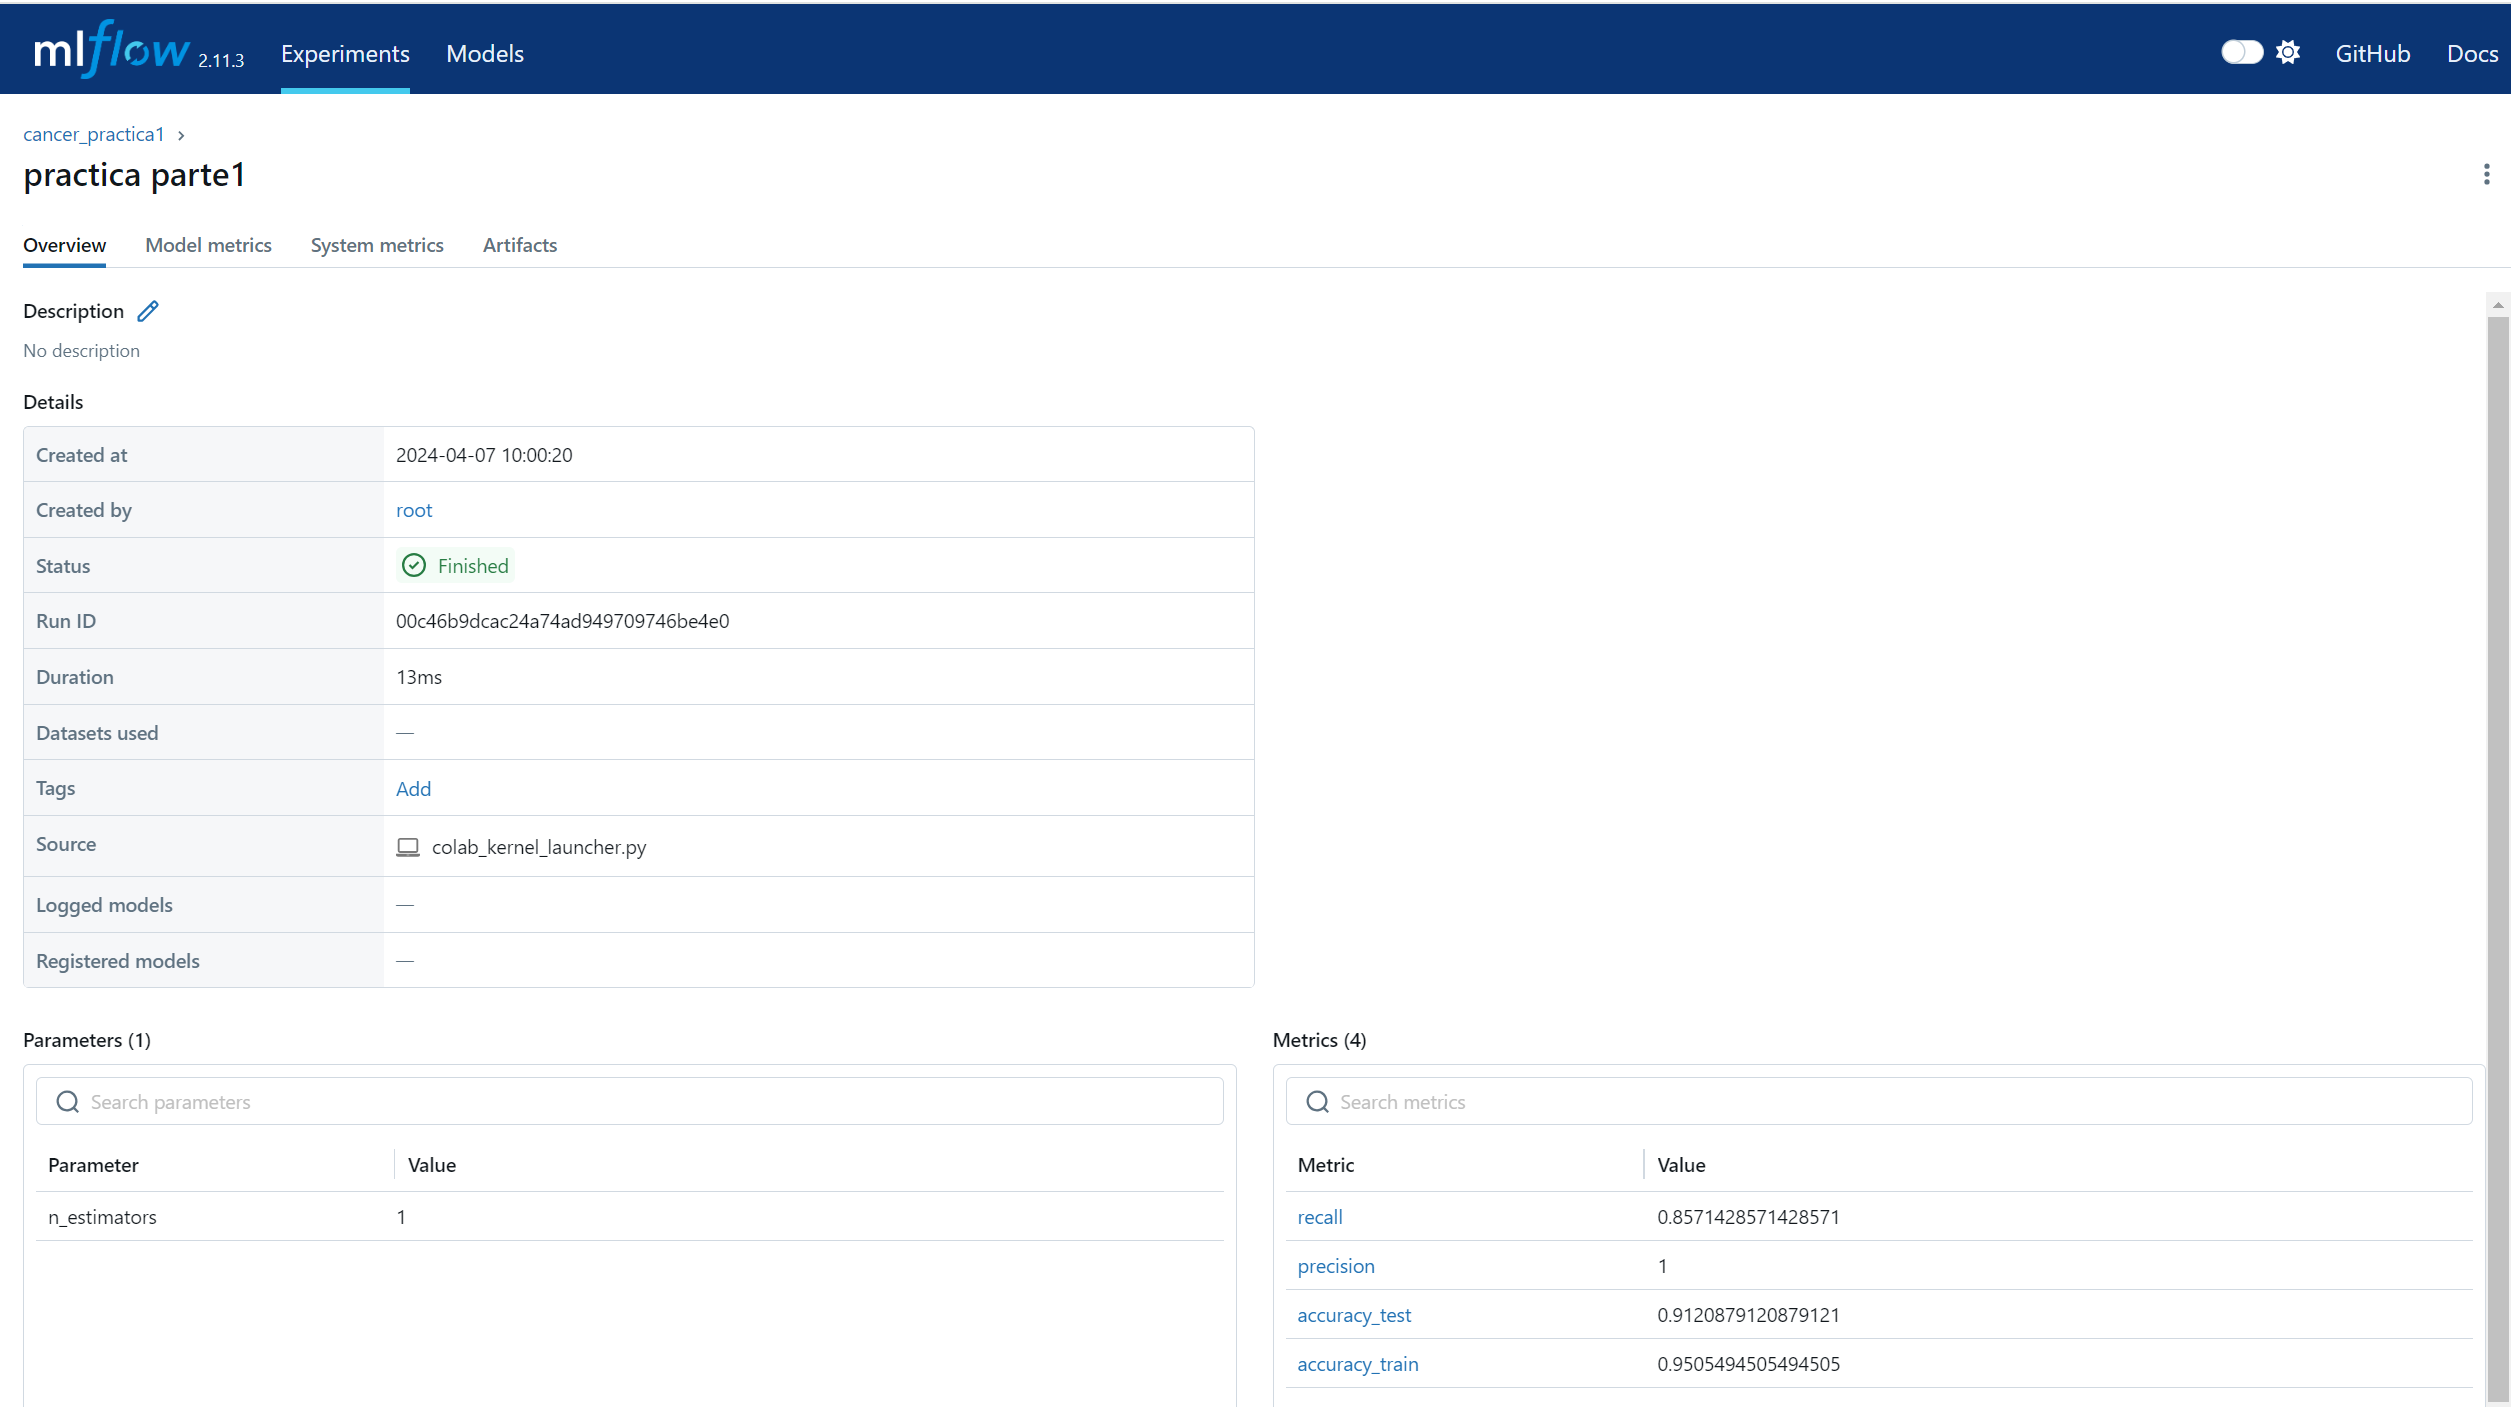

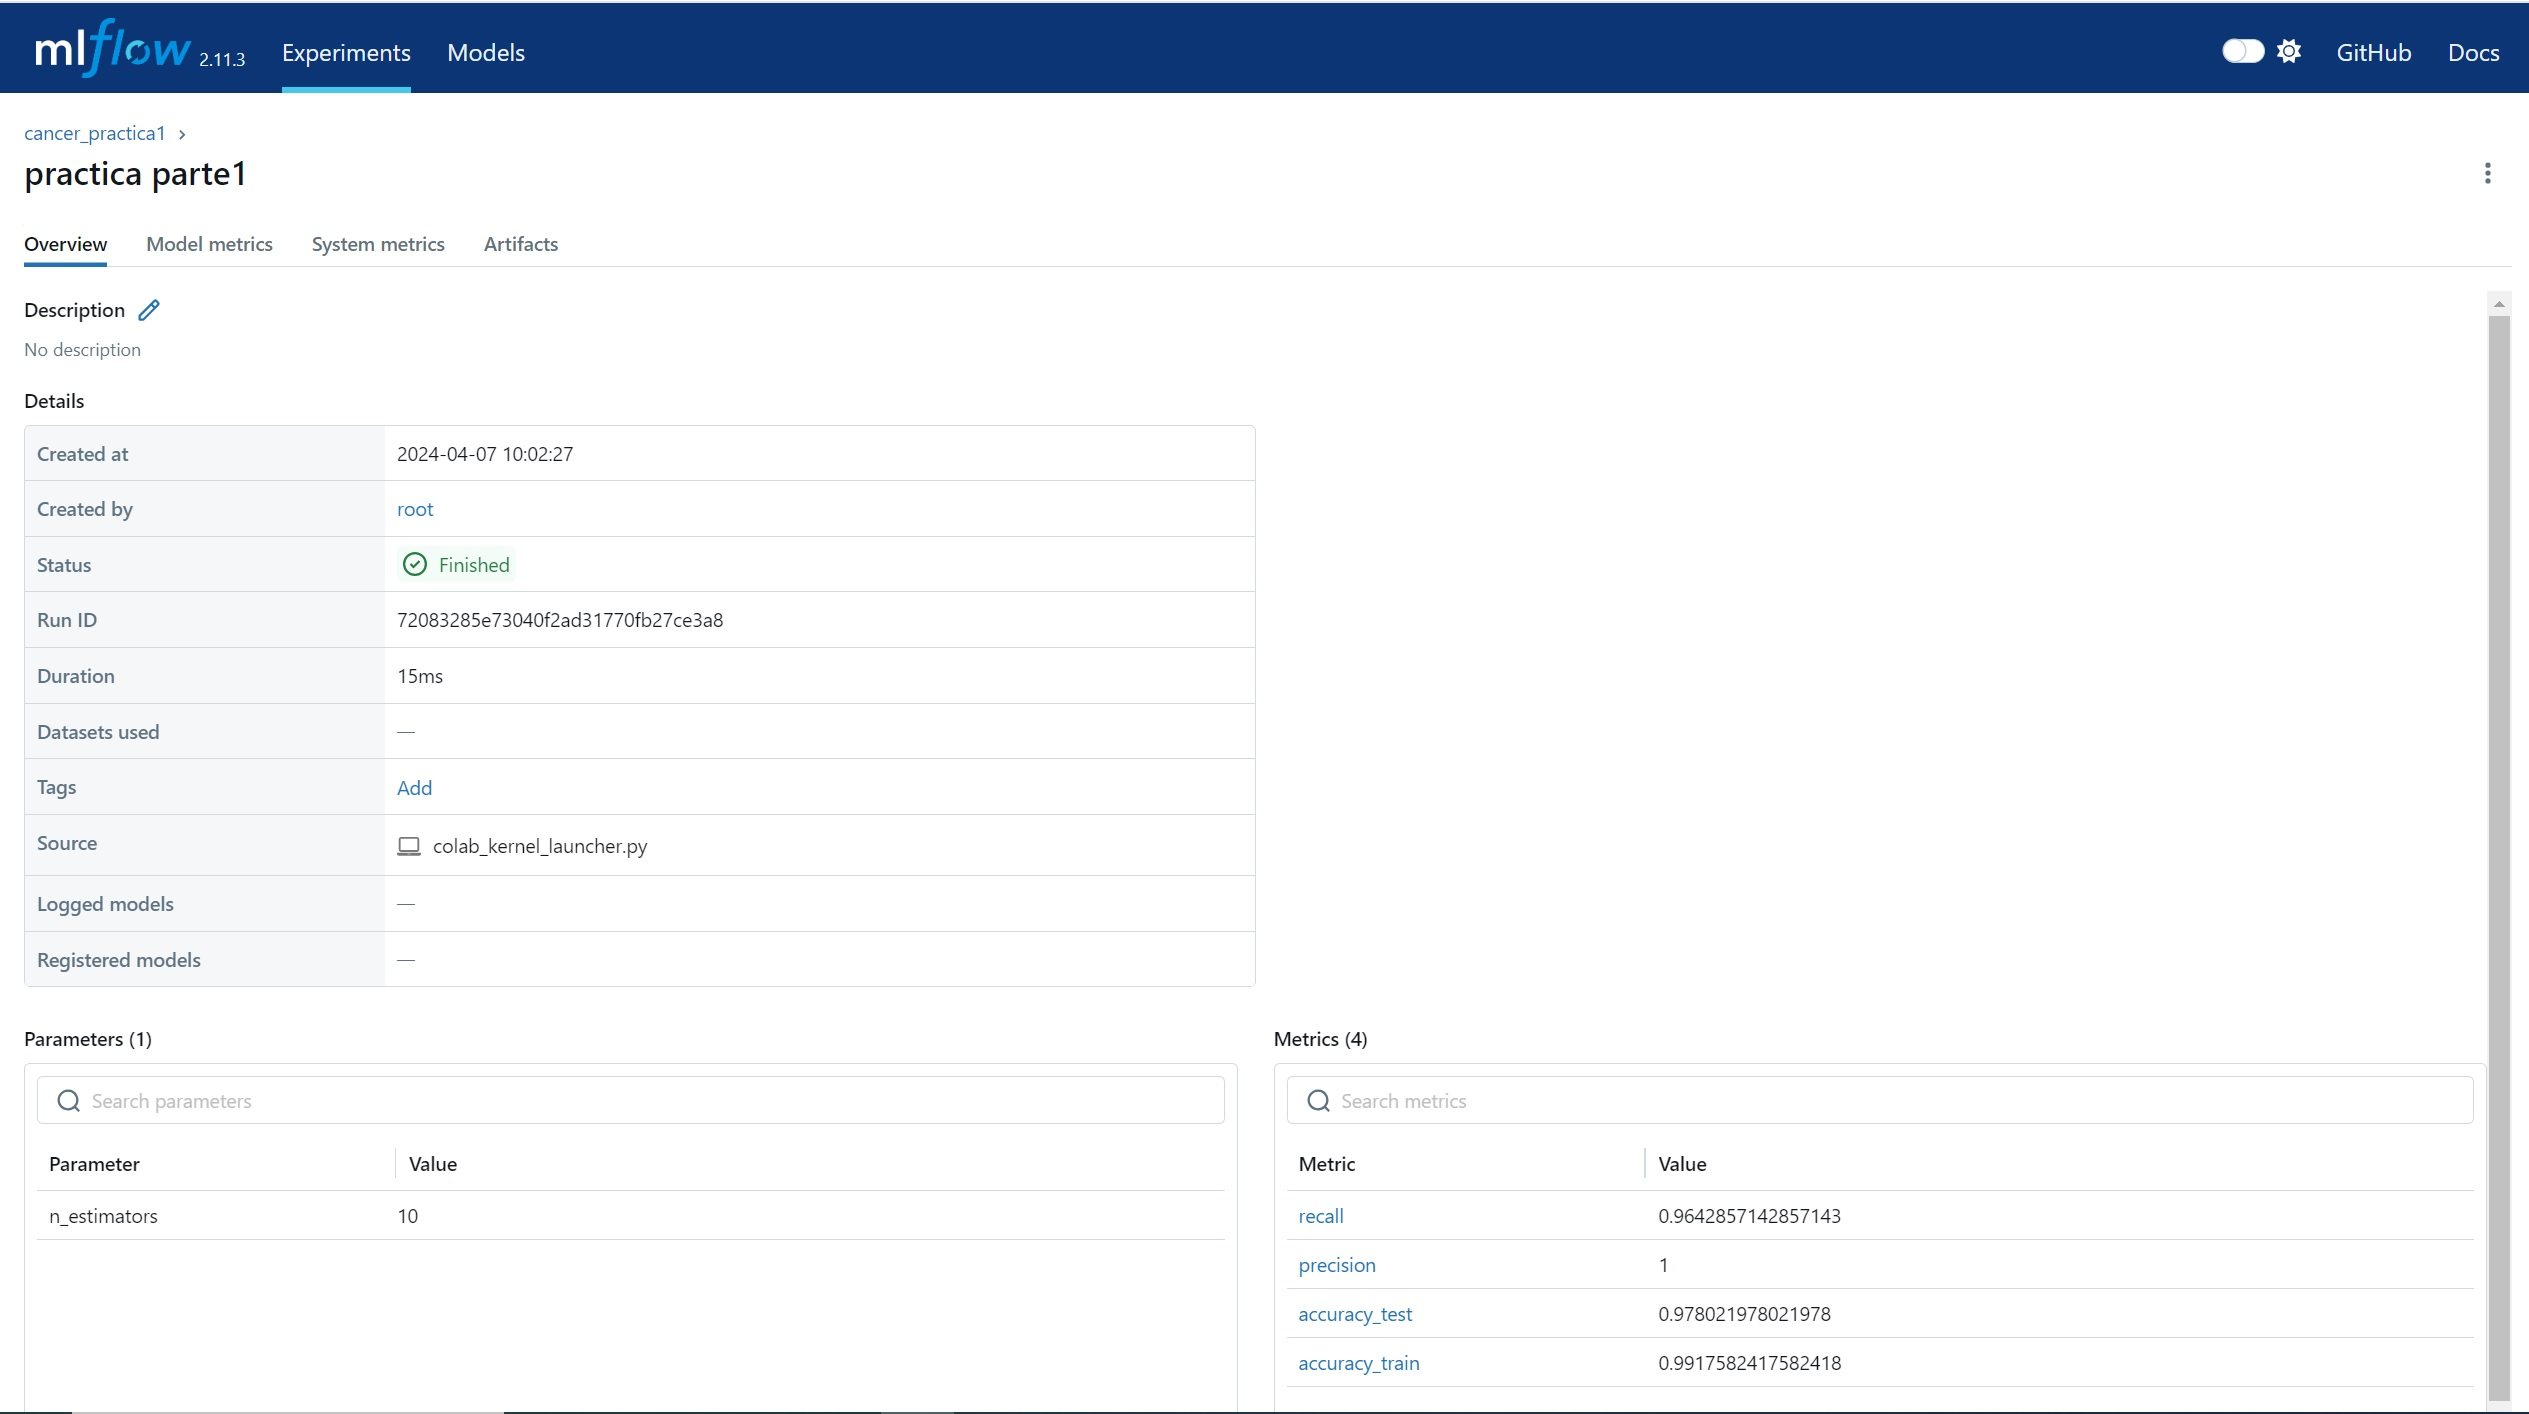
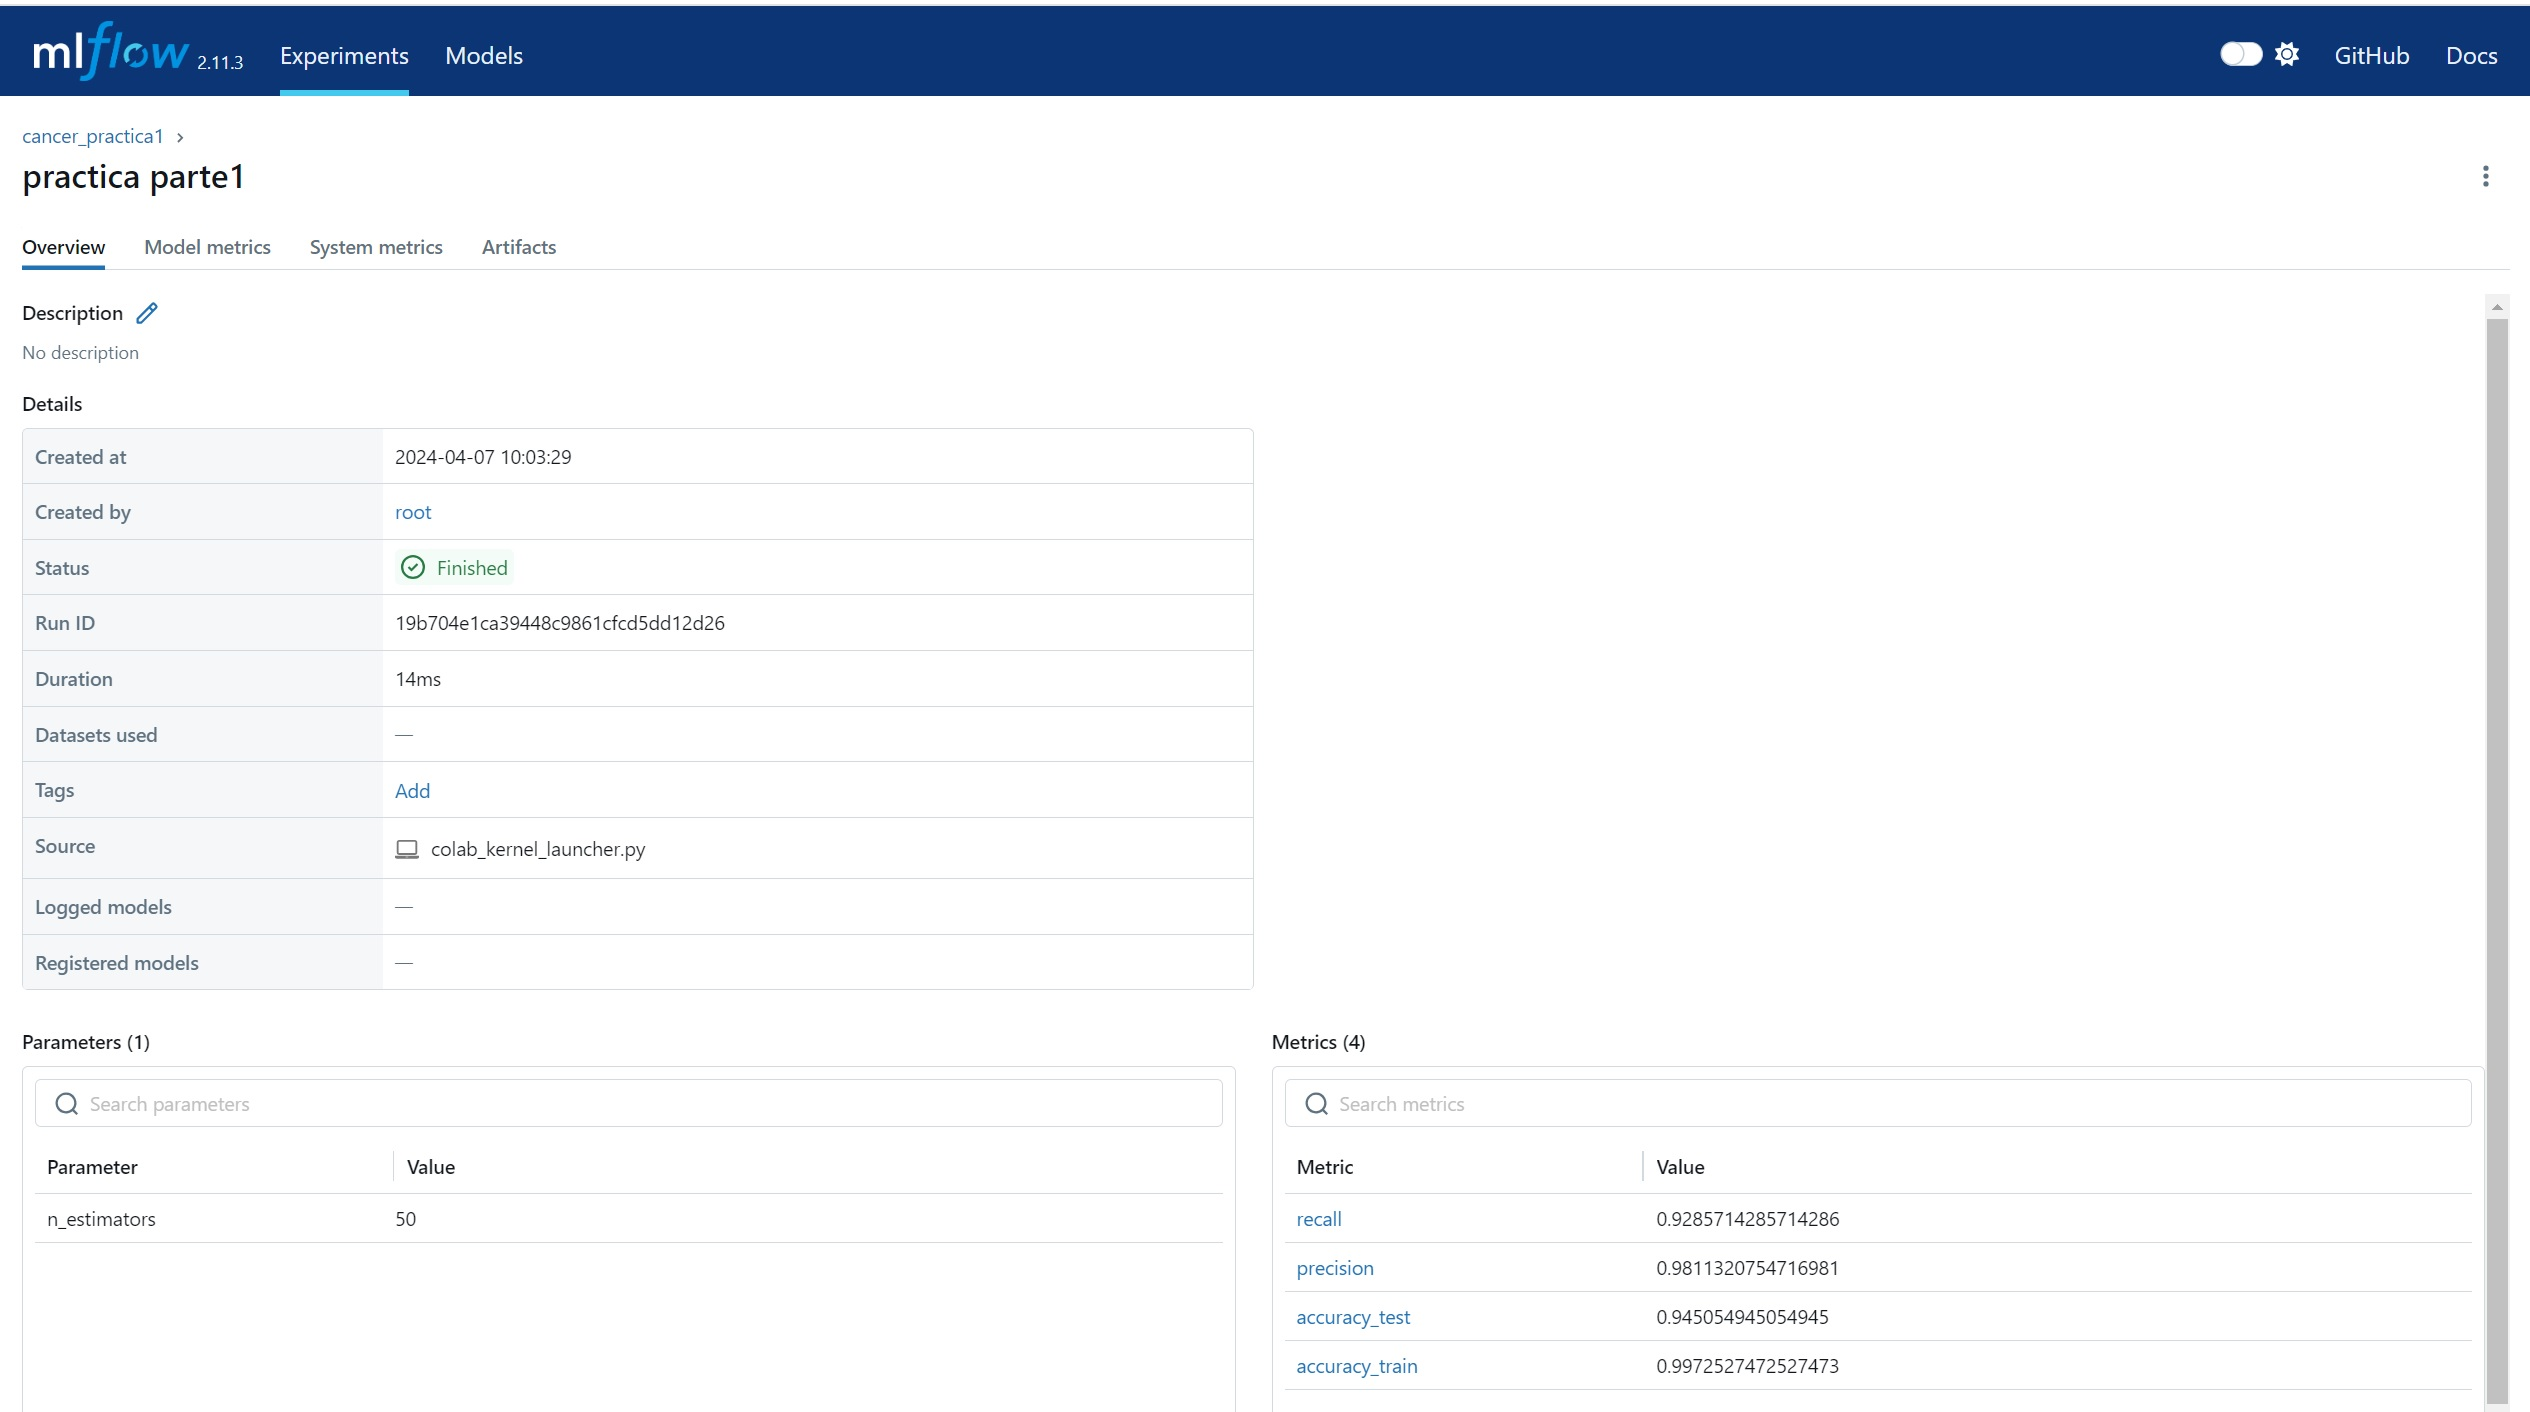

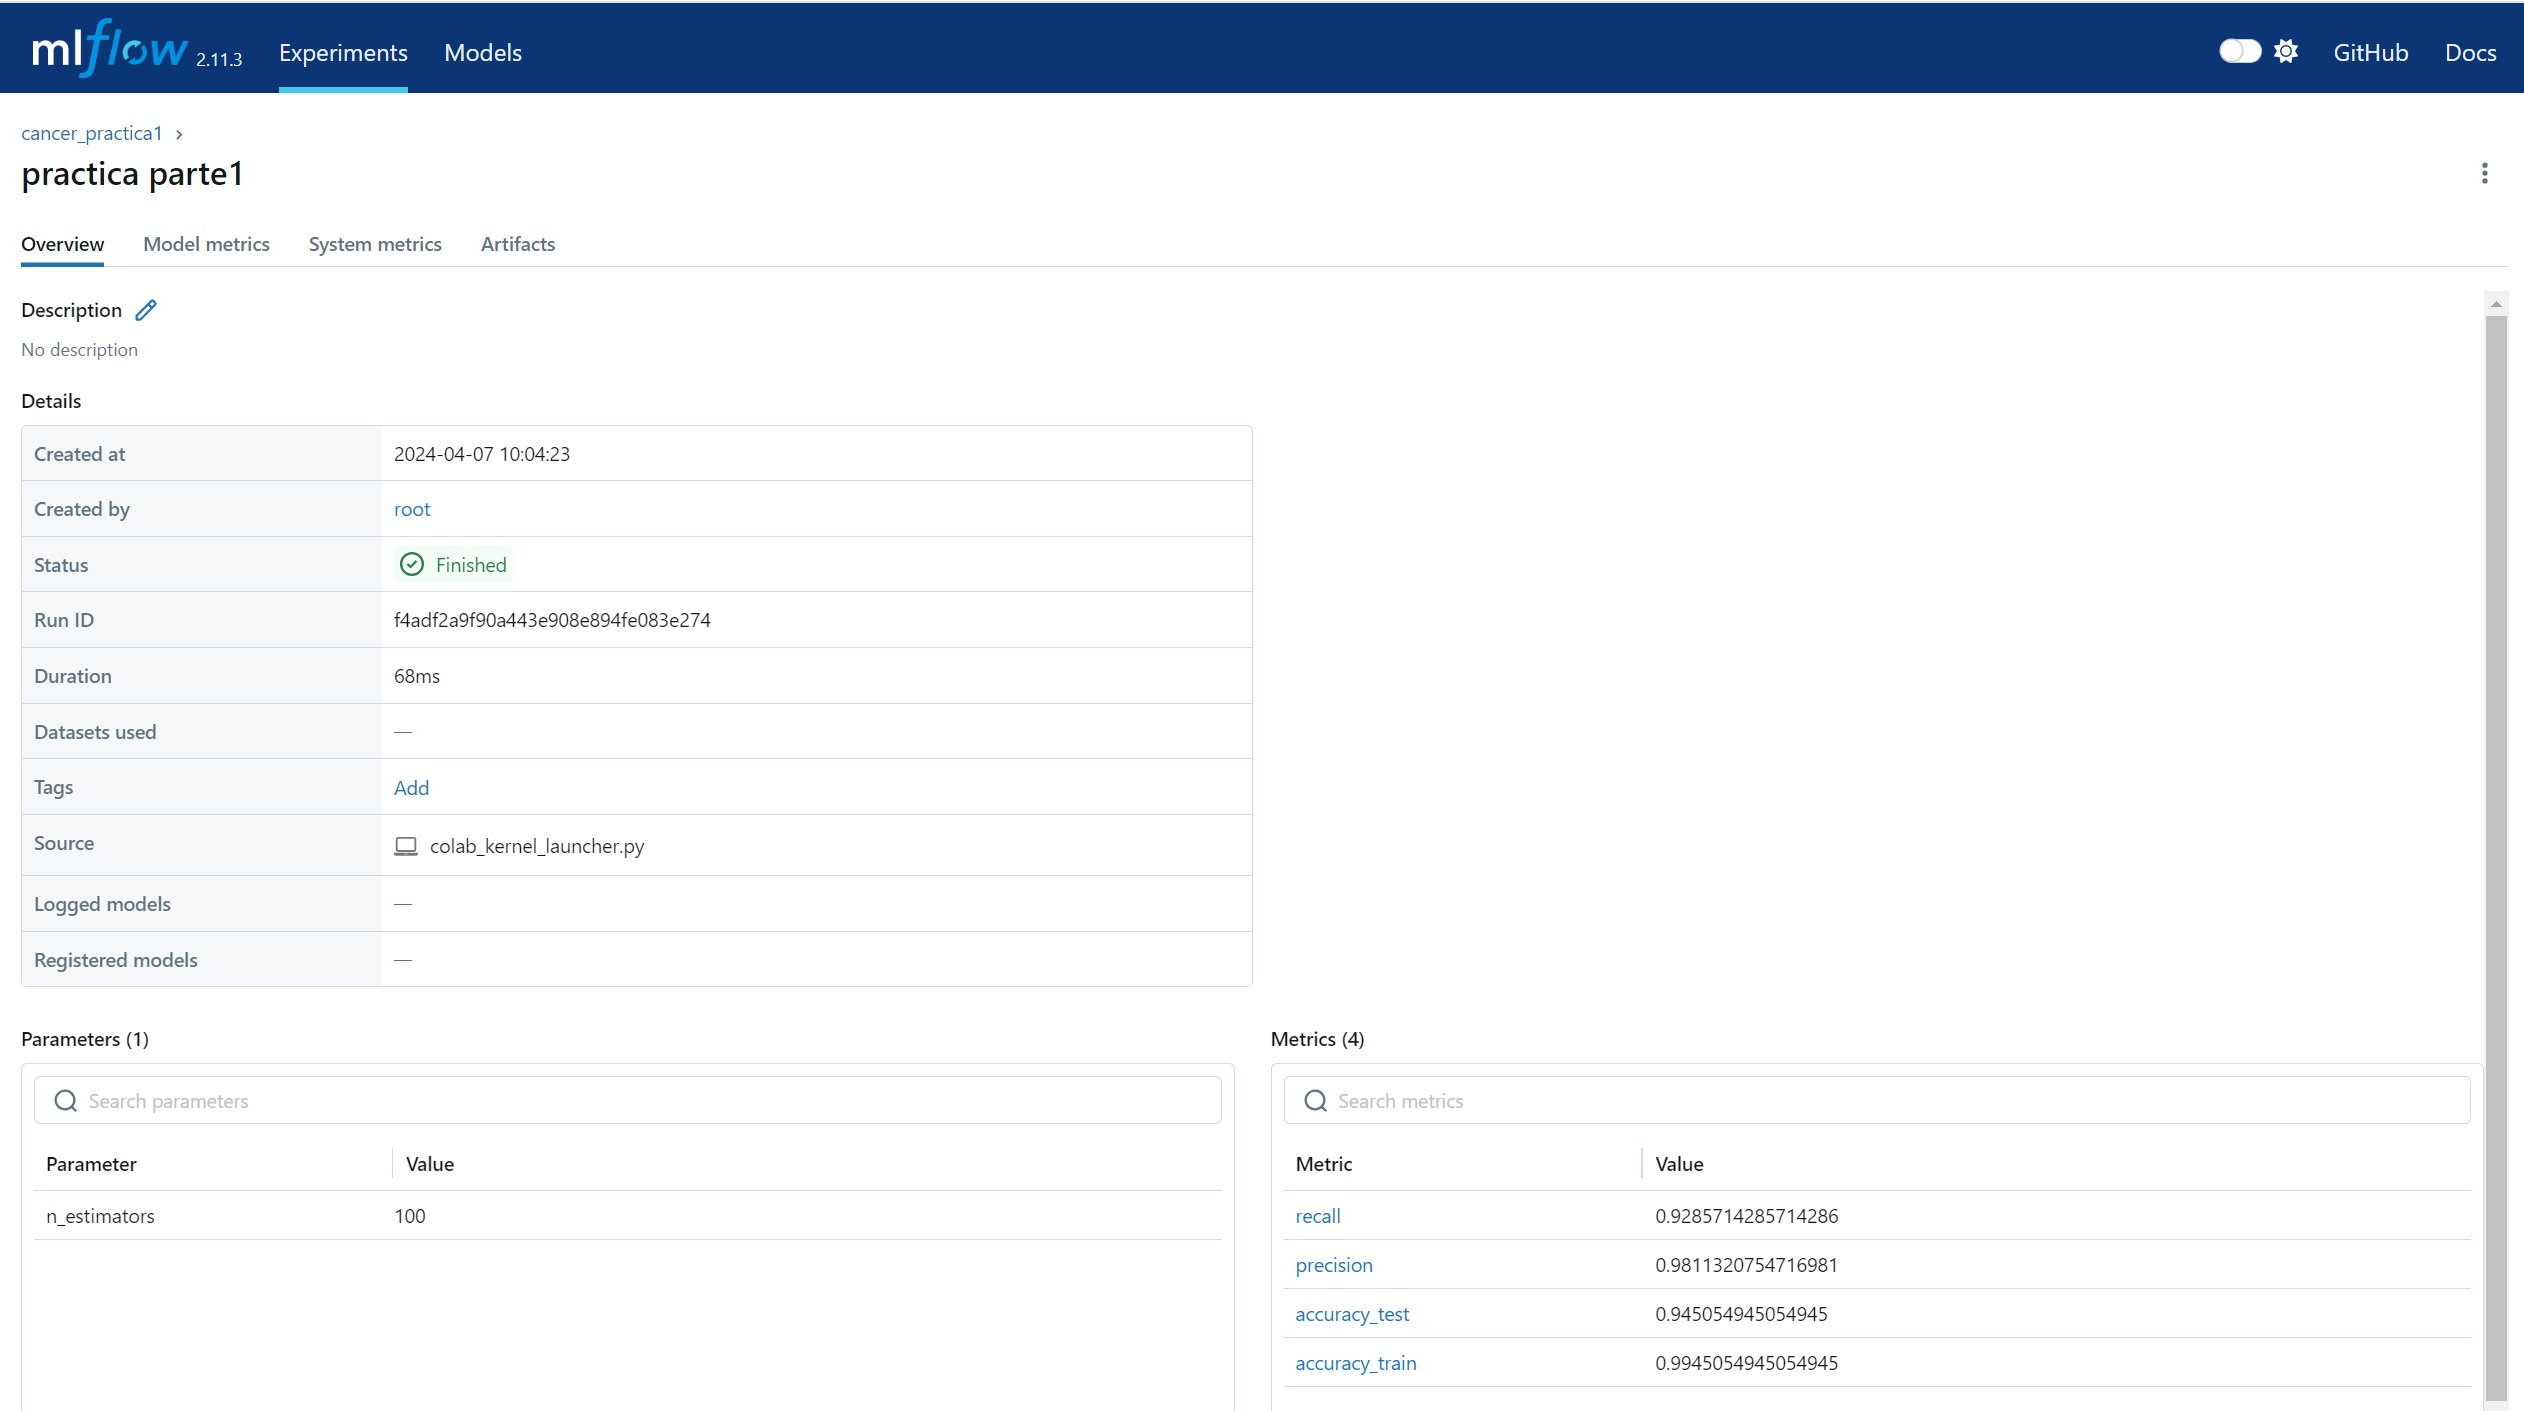

In [16]:
! pip install apache-beam

In [17]:
import apache_beam as beam
from apache_beam.options.pipeline_options import PipelineOptions



In [18]:
PROJECT_ID = " algos-practica " #@param {type:"string"}
! gcloud config set project $PROJECT_ID

Updated property [core/project].


In [19]:
import sys

# If you are running this notebook in Colab, run this cell and follow the
# instructions to authenticate your GCP account. This provides access to your
# Cloud Storage bucket and lets you submit training jobs and prediction
# requests.

if 'google.colab' in sys.modules:
  from google.colab import auth as google_auth
  google_auth.authenticate_user()

# If you are running this notebook locally, replace the string below with the
# path to your service account key and run this cell to authenticate your GCP
# account.
else:
  %env GOOGLE_APPLICATION_CREDENTIALS ''

In [20]:
BUCKET_NAME = "algos-practica" #@param {type:"string"}
REGION = "europe-west1" #@param {type:"string"}

In [21]:
!gsutil mb -l $REGION gs://$BUCKET_NAME

Creating gs://algos-practica/...
ServiceException: 409 A Cloud Storage bucket named 'algos-practica' already exists. Try another name. Bucket names must be globally unique across all Google Cloud projects, including those outside of your organization.


In [22]:
%pip install gdown
! gdown "1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr"

Downloading...
From: https://drive.google.com/uc?id=1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr
To: /content/dataset-cybertrolls.json
100% 2.76M/2.76M [00:00<00:00, 198MB/s]


In [23]:
import pandas as pd
import json

# Rutas de los archivos JSON y CSV
json_file_path = '/content/dataset-cybertrolls.json'
csv_file_path = '/content/dataset-cybertrolls.csv'


data = []

# Lee el archivo JSON línea por línea
with open(json_file_path, 'r') as f:
    for line in f:
        # Intenta cargar cada línea como un objeto JSON
        try:
            json_data = json.loads(line)
            data.append(json_data)
        except json.JSONDecodeError as e:
            print(f"Error al cargar la línea: {line}")

# Convierte los datos en un DataFrame de pandas
df = pd.DataFrame(data)

# Guarda el DataFrame como un archivo CSV
df.to_csv(csv_file_path, index=False)

In [24]:
df = pd.read_csv('/content/dataset-cybertrolls.csv')

# Ahora puedes utilizar la variable df para trabajar con los datos del CSV
print(df.head())

                                             content  \
0                             Get fucking real dude.   
1   She is as dirty as they come  and that crook ...   
2   why did you fuck it up. I could do it all day...   
3   Dude they dont finish enclosing the fucking s...   
4   WTF are you talking about Men? No men thats n...   

                      annotation  extras  
0  {'notes': '', 'label': ['1']}     NaN  
1  {'notes': '', 'label': ['1']}     NaN  
2  {'notes': '', 'label': ['1']}     NaN  
3  {'notes': '', 'label': ['1']}     NaN  
4  {'notes': '', 'label': ['1']}     NaN  


In [25]:
!mkdir troll_detection

mkdir: cannot create directory ‘troll_detection’: File exists


In [26]:
import pandas as pd

# Supongamos que df es tu DataFrame original
# Creamos un nuevo DataFrame con las columnas 'content' y 'label'
new_df = df[['content', 'annotation']]

# Convertimos la columna 'annotation' de diccionarios a strings
new_df['annotation'] = new_df['annotation'].astype(str)

# Extraemos el valor de 'label' de cada diccionario en la columna 'annotation'
new_df['label'] = new_df['annotation'].apply(lambda x: eval(x)['label'][0])

# Eliminamos la columna 'annotation' que ya no necesitamos
new_df.drop(columns=['annotation'], inplace=True)

df.to_csv('/content/troll_detection/dataset-cybertrolls2col.csv', index=False)

# Imprimimos las primeras filas del nuevo DataFrame
print(new_df.head())

<ipython-input-26-b7533776e19c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['annotation'] = new_df['annotation'].astype(str)


                                             content label
0                             Get fucking real dude.     1
1   She is as dirty as they come  and that crook ...     1
2   why did you fuck it up. I could do it all day...     1
3   Dude they dont finish enclosing the fucking s...     1
4   WTF are you talking about Men? No men thats n...     1


In [27]:
!ls


dataset-cybertrolls.csv   mlruns       test.csv		troll_detection
dataset-cybertrolls.json  sample_data  test-target.csv


In [28]:
import shutil
import os


archivo_colab = "/content/dataset-cybertrolls.csv"

carpeta_local = "/content/troll_detection"

nombre_archivo = os.path.basename(archivo_colab)
archivo_destino = os.path.join(carpeta_local, nombre_archivo)

shutil.move(archivo_colab, archivo_destino)

if os.path.exists(archivo_destino):
    print(f"El archivo se movió correctamente a: {archivo_destino}")
else:
    print("Hubo un error al mover el archivo.")

El archivo se movió correctamente a: /content/troll_detection/dataset-cybertrolls.csv


In [29]:
%cd troll_detection

/content/troll_detection


In [30]:
import os

# Set the working directory to the sample code directory
#%cd ./twitter-sentiment-analysis-batch/

WORK_DIR = os.getcwd()
WORK_DIR

'/content/troll_detection'

In [31]:
%%writefile requirements.txt

apache-beam[gcp]
tensorflow
gensim==3.6.0
fsspec==0.8.4
gcsfs==0.7.1
numpy==1.20.0

Overwriting requirements.txt


In [32]:
! pip install -r requirements.txt

  Using cached numpy-1.20.0.zip (8.0 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached h5py-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
  Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Using cached keras-3.1.1-py3-none-any.whl (1.1 MB)
  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
  Using cached tensorflow-2.15.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)
  Using cached tensorflow-2.14.1-cp310-cp310-manylinux_

In [33]:

! pip install apache-beam[gcp]

In [34]:
code = """
from __future__ import absolute_import


import argparse
import logging
import re
import os
import csv
import random

from past.builtins import unicode

import apache_beam as beam
from apache_beam.io import ReadFromText #fichero de texto a colección
from apache_beam.io import WriteToText #colección a fichero de texto
from apache_beam.coders.coders import Coder #gestión de codificación de archivos
from apache_beam.options.pipeline_options import PipelineOptions
from apache_beam.options.pipeline_options import SetupOptions, DirectOptions

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

nltk.download("stopwords")

# CLEANING
STOP_WORDS = stopwords.words("english") #stopwords en inglés
STEMMER = SnowballStemmer("english") #stemmer en inglés
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+" #Expresión regular para limpiar urls


class CustomCoder(Coder):


    def __init__(self, encoding: str):
        # latin-1
        # iso-8859-1
        self.enconding = encoding

    def encode(self, value):
        return value.encode(self.enconding)

    def decode(self, value):
        return value.decode(self.enconding)

    def is_deterministic(self):
        return True

class ExtractColumnsDoFn(beam.DoFn):    #Extrae información de las columnas
    def process(self, element):
        # space removal
        element_split = list(csv.reader(element, delimiter=",")) #convertimos a una lista cada fila de la tabla
        element_split = [x for x in element_split if x != ["", ""]] #eliminamos espacios en blanco
        # text, sentiment
        yield element_split[0][-1], element_split[1][-1] #extraemos la información de la primera y la segunda columna. Usamos yield en lugar de return porque el return devuelve instantáneamente mientras yield espera a que acaben todas las ejecuciones en paralelo.


class PreprocessColumnsTrainFn(beam.DoFn): #realizado todo el preprocesamiento propio de NLP
    def process_sentiment(self, label):  #preprocesa la parte de sentimiento
        if label == 1:
            return "POSITIVE"
        else:
            return "NEGATIVE"




    def process_text(self, text): #preprocesa la parte de texto
        # Elimina link,user y caracteres especiales
        stem = False
        text = re.sub(TEXT_CLEANING_RE, " ", str(text).lower()).strip() #limpiar URL
        tokens = []
        for token in text.split():
            if token not in STOP_WORDS:
                if stem:
                    tokens.append(STEMMER.stem(token)) #stemmiza
                else:
                    tokens.append(token)
        return " ".join(tokens) #devuelve el resultado

    def process(self, element):
        processed_text = self.process_text(element[0]) #procesa texto
        processed_sentiment = self.process_sentiment(element[1]) #procesa sentimiento
        yield f"{processed_text}, {processed_sentiment}"






def run(argv=None, save_main_session=True):





  parser = argparse.ArgumentParser() #instanciamos el parseador de argumentos

  parser.add_argument( #añado argumento y lo guardo en la variable work_dir. Directorio de trabajo
        "--work-dir", dest="work_dir", required=True, help="Working directory",
  )

  parser.add_argument( # añado argumento. Fichero de entrada
        "--input", dest="input", required=True, help="Input dataset in work dir",
    )
  parser.add_argument( # añado argumento. Fichero de salida
        "--output",
        dest="output",
        required=True,
        help="Output path to store transformed data in work dir",
    )
  parser.add_argument( # añado argumento. Indica si estamos entrenando o evaluando
        "--mode",
        dest="mode",
        required=True,
        choices=["train", "test"],
        help="Type of output to store transformed data",
    )

  known_args, pipeline_args = parser.parse_known_args(argv) #recoge los argumentos enviados por consola y los almacena

  # Añadimos configuración de la pipeline
  pipeline_options = PipelineOptions(pipeline_args)
  pipeline_options.view_as(SetupOptions).save_main_session = save_main_session #permite usar dependencias externas como nltk
  pipeline_options.view_as(DirectOptions).direct_num_workers = 0 #número de workers. 0 para que coja el número máximo que tiene la máquina

  # Hasta aquí hemos añadido la configuración, a partir de ahora comenzamos a construir la pipeline:
  with beam.Pipeline(options=pipeline_options) as p:
    # Read the text file[pattern] into a PCollection.
    raw_data = p | "ReadTwitterData" >> ReadFromText(
            known_args.input, coder=CustomCoder("latin-1")) #leemos el texto y tratamos la codificación. Hemos dado un nombre a la transformación

    if known_args.mode == "train":

      transformed_data = ( #construimos datos transformados como la aplicación al raw_data de nuestras dos transformacione
                raw_data
                | "ExtractColumns" >> beam.ParDo(ExtractColumnsDoFn()) #Extreamos información de columna
                | "Preprocess" >> beam.ParDo(PreprocessColumnsTrainFn()) #Preprocesamos la información
            )
      #Vamos a construir un conjunto de validación
      eval_percent = 20
      assert 0 < eval_percent < 100, "eval_percent must in the range (0-100)"
      train_dataset, eval_dataset = (
                transformed_data
                | "Split dataset"
                >> beam.Partition( #particionamos nuestros datos cumpliendo
                    lambda elem, _: int(random.uniform(0, 100) < eval_percent), 2
                ) # el 2 es el número de particiones
            )

      train_dataset | "TrainWriteToCSV" >> WriteToText( # escribimos el conjunto de train en un csv
                os.path.join(known_args.output, "train", "part") #part genera las distintas particiones para cada fichero. Es el prefijo del fichero.
            )
      eval_dataset | "EvalWriteToCSV" >> WriteToText( # escribimos el conjunto de eval en un csv
                os.path.join(known_args.output, "eval", "part") #part genera las distintas particiones para cada fichero. Es el prefijo del fichero.
            )

    else:
      transformed_data = (
                raw_data
                | "ExtractColumns" >> beam.ParDo(ExtractColumnsDoFn()) #De nuevo extraemos la información de columnas
                | "Preprocess" >> beam.Map(lambda x: f'"{x[0]}"') # En este caso solo nos quedamos con la columna de texto sin preprocesar.
            )

      transformed_data | "TestWriteToCSV" >> WriteToText(
                os.path.join(known_args.output, "test", "part") #escribimos de nuevo a un fichero de texto.
            )


if __name__ == "__main__":
    logging.getLogger().setLevel(logging.INFO)
    run()

"""

with open("pipeline_preprocess.py", "w") as file:
    file.write(code)

In [35]:
WORK_DIR

'/content/troll_detection'

In [36]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Lee el archivo CSV
data = pd.read_csv('/content/troll_detection/dataset-cybertrolls2col.csv')

# Divide los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Guarda los conjuntos de datos de entrenamiento y prueba en archivos CSV separados
train_data.to_csv("/content/troll_detection/train_data.csv", index=False)
test_data.to_csv("/content/troll_detection/test_data.csv", index=False)

In [37]:
! python3 pipeline_preprocess.py \
  --work-dir $WORK_DIR \
  --runner DirectRunner \
  --input $WORK_DIR/train_data.csv \
  --output $WORK_DIR/train_transformed_data \
  --mode train

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function annotate_downstream_side_inputs at 0x7e563e064e50> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function fix_side_input_pcoll_coders at 0x7e563e064f70> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function pack_combiners at 0x7e563e065480> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function lift_combiners at 0x7e563e065510> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function expand_sdf at 0x7e563e0656c0> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function expand_gbk

In [38]:
! python3 pipeline_preprocess.py \
  --work-dir $WORK_DIR \
  --runner DirectRunner \
  --input $WORK_DIR/test_data.csv \
  --output $WORK_DIR/transformed_data \
  --mode test

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function annotate_downstream_side_inputs at 0x7c470df90430> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function fix_side_input_pcoll_coders at 0x7c470df90550> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function pack_combiners at 0x7c470df90a60> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function lift_combiners at 0x7c470df90af0> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function expand_sdf at 0x7c470df90ca0> ====================
INFO:apache_beam.runners.portability.fn_api_runner.translations:==================== <function expand_gbk

In [60]:
%%writefile setup.py

import setuptools

REQUIRED_PACKAGES = [
  "apache-beam[gcp]",
  "tensorflow",
  "gensim==3.6.0",
  "fsspec==0.8.4",
  "gcsfs==0.7.1",
  "numpy==1.20.0"
]

setuptools.setup(
    name="twitchstreaming",
    version="0.0.1",
    install_requires=REQUIRED_PACKAGES,
    packages=setuptools.find_packages(),
    include_package_data=True,
    description="Troll detection",
)

Overwriting setup.py


In [46]:
! gdown "1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr"
! gsutil cp dataset-cybertrolls.json //$WORK_DIR/data.json

Downloading...
From: https://drive.google.com/uc?id=1dTaKofC9ZcMWa5cVtGLDFkEnbc4hiPJr
To: /content/troll_detection/dataset-cybertrolls.json
100% 2.76M/2.76M [00:00<00:00, 139MB/s]
Copying file://dataset-cybertrolls.json...
/ [1 files][  2.6 MiB/  2.6 MiB]                                                
Operation completed over 1 objects/2.6 MiB.                                      


In [62]:
! pip install --upgrade numpy scipy pandas

ERROR: Operation cancelled by user


In [48]:
PROJECT_ID = "algos-practica " #@param {type:"string"}
! gcloud config set project $PROJECT_ID
BUCKET_NAME = "algos-practica " #@param {type:"string"}
REGION = "europe-west1" #@param {type:"string"}

print(f"Project: {PROJECT_ID}")
print(f"Region: {REGION}")
print(f"Bucket: {BUCKET_NAME}")

%cd troll_detection
!ls

import os
WORK_DIR = os.getcwd()

Updated property [core/project].
Project: algos-practica 
Region: europe-west1
Bucket: algos-practica 
[Errno 2] No such file or directory: 'troll_detection'
/content/troll_detection
data.json		     dataset-cybertrolls.json  setup.py        trainer
dataset-cybertrolls2col.csv  pipeline_preprocess.py    test_data.csv   train_transformed_data
dataset-cybertrolls.csv      requirements.txt	       train_data.csv  transformed_data


In [49]:
!mkdir -p trainer
!touch trainer/task-work.py

In [51]:
task_content = """
from __future__ import absolute_import

import argparse
import multiprocessing as mp
import logging
import tempfile
import os

import pickle
import gensim
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Embedding,
    LSTM,
)
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder


# WORD2VEC
W2V_SIZE = 300
W2V_WINDOW = 7
# 32
W2V_EPOCH = 5
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"


def generate_word2vec(train_df):
    documents = [_text.split() for _text in train_df.text.values]
    w2v_model = gensim.models.word2vec.Word2Vec(
        vector_size=W2V_SIZE,
        window=W2V_WINDOW,
        min_count=W2V_MIN_COUNT,
        workers=mp.cpu_count(),
    )
    w2v_model.build_vocab(documents)

    words = w2v_model.wv.index_to_key
    vocab_size = len(words)
    logging.info(f"Vocab size: {vocab_size}")
    w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

    return w2v_model


def generate_tokenizer(train_df):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_df.text)
    vocab_size = len(tokenizer.word_index) + 1
    logging.info(f"Total words: {vocab_size}")
    return tokenizer, vocab_size


def generate_label_encoder(train_df):
    encoder = LabelEncoder()
    encoder.fit(train_df.sentiment.tolist())
    return encoder


def generate_embedding(word2vec_model, vocab_size, tokenizer):
    embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
    for word, i in tokenizer.word_index.items():
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]
    return Embedding(
        vocab_size,
        W2V_SIZE,
        weights=[embedding_matrix],
        input_length=SEQUENCE_LENGTH,
        trainable=False,
    )


def train_and_evaluate(
    work_dir, train_df, eval_df, batch_size=1024, epochs=8, steps=1000
):



    model_dir = os.path.join(work_dir, "data/model")
    if tf.io.gfile.exists(model_dir):
        tf.io.gfile.rmtree(model_dir)
    tf.io.gfile.mkdir(model_dir)

    # Specify where to store our model
    run_config = tf.estimator.RunConfig()
    run_config = run_config.replace(model_dir=model_dir)

    # This will give us a more granular visualization of the training
    run_config = run_config.replace(save_summary_steps=10)

    # Create Word2vec of training data
    logging.info("---- Generating word2vec model ----")
    word2vec_model = generate_word2vec(train_df)

    # Tokenize training data
    logging.info("---- Generating tokenizer ----")
    tokenizer, vocab_size = generate_tokenizer(train_df)

    logging.info("---- Tokenizing train data ----")
    x_train = pad_sequences(
        tokenizer.texts_to_sequences(train_df.text), maxlen=SEQUENCE_LENGTH
    )
    logging.info("---- Tokenizing eval data ----")
    x_eval = pad_sequences(
        tokenizer.texts_to_sequences(eval_df.text), maxlen=SEQUENCE_LENGTH
    )

    # Label Encoder
    logging.info("---- Generating label encoder ----")
    label_encoder = generate_label_encoder(train_df)

    logging.info("---- Encoding train target ----")
    y_train = label_encoder.transform(train_df.sentiment.tolist())
    logging.info("---- Encoding eval target ----")
    y_eval = label_encoder.transform(eval_df.sentiment.tolist())

    y_train = y_train.reshape(-1, 1)
    y_eval = y_eval.reshape(-1, 1)

    # Create Embedding Layer
    logging.info("---- Generating embedding layer ----")
    embedding_layer = generate_embedding(word2vec_model, vocab_size, tokenizer)

    logging.info("---- Generating Sequential model ----")
    model = Sequential()
    model.add(embedding_layer)
    model.add(Dropout(0.5))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation="sigmoid"))

    model.summary()

    logging.info("---- Adding loss function to model ----")
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    logging.info("---- Adding callbacks to model ----")
    callbacks = [
        ReduceLROnPlateau(monitor="val_loss", patience=5, cooldown=0),
        EarlyStopping(monitor="val_accuracy", min_delta=1e-4, patience=5),
    ]

    logging.info("---- Training model ----")
    model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        steps_per_epoch=steps,
        epochs=epochs,
        validation_split=0.1,
        verbose=1,
        callbacks=callbacks,
    )

    logging.info("---- Evaluating model ----")
    score = model.evaluate(x_eval, y_eval, batch_size=batch_size)
    logging.info(f"ACCURACY: {score[1]}")
    logging.info(f"LOSS: {score[0]}")

    logging.info("---- Saving models ----")
    pickle.dump(
        tokenizer,
        tf.io.gfile.GFile(os.path.join(model_dir, TOKENIZER_MODEL), mode="wb"),
        protocol=0,
    )
    with tempfile.NamedTemporaryFile(suffix=".h5") as local_file:
        with tf.io.gfile.GFile(
            os.path.join(model_dir, KERAS_MODEL), mode="wb"
        ) as gcs_file:
            model.save(local_file.name)
            gcs_file.write(local_file.read())

    # word2vec_model.save(os.path.join(model_dir, WORD2VEC_MODEL))

    # pickle.dump(
    #     label_encoder, open(os.path.join(model_dir, ENCODER_MODEL), "wb"), protocol=0
    # )


if __name__ == "__main__":



    logging.getLogger().setLevel(logging.INFO)

    parser = argparse.ArgumentParser(
        formatter_class=argparse.ArgumentDefaultsHelpFormatter
    )

    parser.add_argument(
        "--job-dir",
        help="Directory for staging trainer files. "
        "This can be a Google Cloud Storage path.",
    )

    parser.add_argument(
        "--work-dir",
        required=True,
        help="Directory for staging and working files. "
        "This can be a Google Cloud Storage path.",
    )

    parser.add_argument(
        "--batch-size",
        type=int,
        default=1024,
        help="Batch size for training and evaluation.",
    )

    parser.add_argument(
        "--epochs", type=int, default=8, help="Number of epochs to train the model",
    )

    parser.add_argument(
        "--steps",
        type=int,
        default=1000,
        help="Number of steps per epoch to train the model",
    )

    args = parser.parse_args()

    train_data_files = tf.io.gfile.glob(
        os.path.join(args.work_dir, "data/transformed_data/train/part-*")
    )
    eval_data_files = tf.io.gfile.glob(
        os.path.join(args.work_dir, "data/transformed_data/eval/part-*")
    )

    train_df = pd.concat(
        [
            pd.read_csv(
                f,
                names=["text", "sentiment"],
                dtype={"text": "string", "sentiment": "string"},
            )
            for f in train_data_files
        ]
    ).dropna()

    eval_df = pd.concat(
        [
            pd.read_csv(
                f,
                names=["text", "sentiment"],
                dtype={"text": "string", "sentiment": "string"},
            )
            for f in eval_data_files
        ]
    ).dropna()

    train_and_evaluate(
        args.work_dir,
        train_df=train_df,
        eval_df=eval_df,
        batch_size=args.batch_size,
        epochs=args.epochs,
        steps=args.steps,
    )

"""

# Guarda el contenido en el archivo 'task-work.py'
task_work_file = os.path.join('/content/troll_detection/trainer', "task-work.py")
with open(task_work_file, "w") as f:
    f.write(task_work_file)

In [55]:
task_content = """
from __future__ import absolute_import

import argparse
import multiprocessing as mp
import logging
import tempfile
import os

import pickle
import gensim
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Embedding,
    LSTM,
)
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder


# WORD2VEC
W2V_SIZE = 300
W2V_WINDOW = 7
# 32
W2V_EPOCH = 5
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300

# SENTIMENT
POSITIVE = "POSITIVE"
NEGATIVE = "NEGATIVE"
NEUTRAL = "NEUTRAL"
SENTIMENT_THRESHOLDS = (0.4, 0.7)

# EXPORT
KERAS_MODEL = "model.h5"
WORD2VEC_MODEL = "model.w2v"
TOKENIZER_MODEL = "tokenizer.pkl"
ENCODER_MODEL = "encoder.pkl"


def generate_word2vec(train_df):
    documents = [_text.split() for _text in train_df.text.values]
    w2v_model = gensim.models.word2vec.Word2Vec(
        vector_size=W2V_SIZE,
        window=W2V_WINDOW,
        min_count=W2V_MIN_COUNT,
        workers=mp.cpu_count(),
    )
    w2v_model.build_vocab(documents)

    words = w2v_model.wv.index_to_key
    vocab_size = len(words)
    logging.info(f"Vocab size: {vocab_size}")
    w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

    return w2v_model


def generate_tokenizer(train_df):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_df.text)
    vocab_size = len(tokenizer.word_index) + 1
    logging.info(f"Total words: {vocab_size}")
    return tokenizer, vocab_size


def generate_label_encoder(train_df):
    encoder = LabelEncoder()
    encoder.fit(train_df.sentiment.tolist())
    return encoder


def generate_embedding(word2vec_model, vocab_size, tokenizer):
    embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
    for word, i in tokenizer.word_index.items():
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word]
    return Embedding(
        vocab_size,
        W2V_SIZE,
        weights=[embedding_matrix],
        input_length=SEQUENCE_LENGTH,
        trainable=False,
    )


def train_and_evaluate(
    work_dir, train_df, eval_df, batch_size=1024, epochs=8, steps=1000
):



    model_dir = os.path.join(work_dir, "data/model")
    if tf.io.gfile.exists(model_dir):
        tf.io.gfile.rmtree(model_dir)
    tf.io.gfile.mkdir(model_dir)

    # Specify where to store our model
    run_config = tf.estimator.RunConfig()
    run_config = run_config.replace(model_dir=model_dir)

    # This will give us a more granular visualization of the training
    run_config = run_config.replace(save_summary_steps=10)

    # Create Word2vec of training data
    logging.info("---- Generating word2vec model ----")
    word2vec_model = generate_word2vec(train_df)

    # Tokenize training data
    logging.info("---- Generating tokenizer ----")
    tokenizer, vocab_size = generate_tokenizer(train_df)

    logging.info("---- Tokenizing train data ----")
    x_train = pad_sequences(
        tokenizer.texts_to_sequences(train_df.text), maxlen=SEQUENCE_LENGTH
    )
    logging.info("---- Tokenizing eval data ----")
    x_eval = pad_sequences(
        tokenizer.texts_to_sequences(eval_df.text), maxlen=SEQUENCE_LENGTH
    )

    # Label Encoder
    logging.info("---- Generating label encoder ----")
    label_encoder = generate_label_encoder(train_df)

    logging.info("---- Encoding train target ----")
    y_train = label_encoder.transform(train_df.sentiment.tolist())
    logging.info("---- Encoding eval target ----")
    y_eval = label_encoder.transform(eval_df.sentiment.tolist())

    y_train = y_train.reshape(-1, 1)
    y_eval = y_eval.reshape(-1, 1)

    # Create Embedding Layer
    logging.info("---- Generating embedding layer ----")
    embedding_layer = generate_embedding(word2vec_model, vocab_size, tokenizer)

    logging.info("---- Generating Sequential model ----")
    model = Sequential()
    model.add(embedding_layer)
    model.add(Dropout(0.5))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation="sigmoid"))

    model.summary()

    logging.info("---- Adding loss function to model ----")
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    logging.info("---- Adding callbacks to model ----")
    callbacks = [
        ReduceLROnPlateau(monitor="val_loss", patience=5, cooldown=0),
        EarlyStopping(monitor="val_accuracy", min_delta=1e-4, patience=5),
    ]

    logging.info("---- Training model ----")
    model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        steps_per_epoch=steps,
        epochs=epochs,
        validation_split=0.1,
        verbose=1,
        callbacks=callbacks,
    )

    logging.info("---- Evaluating model ----")
    score = model.evaluate(x_eval, y_eval, batch_size=batch_size)
    logging.info(f"ACCURACY: {score[1]}")
    logging.info(f"LOSS: {score[0]}")

    logging.info("---- Saving models ----")
    pickle.dump(
        tokenizer,
        tf.io.gfile.GFile(os.path.join(model_dir, TOKENIZER_MODEL), mode="wb"),
        protocol=0,
    )
    with tempfile.NamedTemporaryFile(suffix=".h5") as local_file:
        with tf.io.gfile.GFile(
            os.path.join(model_dir, KERAS_MODEL), mode="wb"
        ) as gcs_file:
            model.save(local_file.name)
            gcs_file.write(local_file.read())

    # word2vec_model.save(os.path.join(model_dir, WORD2VEC_MODEL))

    # pickle.dump(
    #     label_encoder, open(os.path.join(model_dir, ENCODER_MODEL), "wb"), protocol=0
    # )


if __name__ == "__main__":



    logging.getLogger().setLevel(logging.INFO)

    parser = argparse.ArgumentParser(
        formatter_class=argparse.ArgumentDefaultsHelpFormatter
    )

    parser.add_argument(
        "--job-dir",
        help="Directory for staging trainer files. "
        "This can be a Google Cloud Storage path.",
    )

    parser.add_argument(
        "--work-dir",
        required=True,
        help="Directory for staging and working files. "
        "This can be a Google Cloud Storage path.",
    )

    parser.add_argument(
        "--batch-size",
        type=int,
        default=1024,
        help="Batch size for training and evaluation.",
    )

    parser.add_argument(
        "--epochs", type=int, default=8, help="Number of epochs to train the model",
    )

    parser.add_argument(
        "--steps",
        type=int,
        default=1000,
        help="Number of steps per epoch to train the model",
    )

    args = parser.parse_args()

    train_data_files = tf.io.gfile.glob(
        os.path.join(args.work_dir, "data/transformed_data/train/part-*")
    )
    eval_data_files = tf.io.gfile.glob(
        os.path.join(args.work_dir, "data/transformed_data/eval/part-*")
    )

    train_df = pd.concat(
        [
            pd.read_csv(
                f,
                names=["text", "sentiment"],
                dtype={"text": "string", "sentiment": "string"},
            )
            for f in train_data_files
        ]
    ).dropna()

    eval_df = pd.concat(
        [
            pd.read_csv(
                f,
                names=["text", "sentiment"],
                dtype={"text": "string", "sentiment": "string"},
            )
            for f in eval_data_files
        ]
    ).dropna()

    train_and_evaluate(
        args.work_dir,
        train_df=train_df,
        eval_df=eval_df,
        batch_size=args.batch_size,
        epochs=args.epochs,
        steps=args.steps,
    )
"""
task_file = os.path.join('/content/troll_detection/trainer', "task.py")
with open(task_file, "w") as f:
    f.write(task_content)


In [53]:
%%writefile trainer/__init__.py

version = "0.1.0"

Overwriting trainer/__init__.py


In [64]:
# Explicitly tell `gcloud ai-platform local train` to use Python 3
! gcloud config set ml_engine/local_python $(which python3)

# This is similar to `python -m trainer.task --job-dir local-training-output`
# but it better replicates the AI Platform environment, especially for
# distributed training (not applicable here).
! gcloud ai-platform local train \
  --package-path trainer \
  --module-name trainer.task \
  -- \
  --work-dir $WORK_DIR \
  --epochs 1

Updated property [ml_engine/local_python].
Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/content/troll_detection/trainer/task.py", line 11, in <module>
    import gensim
  File "/usr/local/lib/python3.10/dist-packages/gensim/__init__.py", line 5, in <module>
    from gensim import parsing, corpora, matutils, interfaces, models, similarities, summarization, utils  # noqa:F401
  File "/usr/local/lib/python3.10/dist-packages/gensim/corpora/__init__.py", line 6, in <module>
    from .indexedcorpus import IndexedCorpus  # noqa:F401 must appear before the other classes
  File "/usr/local/lib/python3.10/dist-packages/gensim/corpora/indexedcorpus.py", line 15, in <module>
    from gensim import interfaces, utils
  File "/usr/local/lib/python3.10/dist-packages/gensim/interfaces.py", line 21, 